In [ ]:
# Supermarket Sales Data Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# loading dataset

datapath = '../datasets/supermarket_sales - Sheet1.csv'
sales_df = pd.read_csv(datapath)
sales_df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Exploring datasets

In [6]:
# information about datasets
sales_df.shape


(1000, 17)

In [ ]:
# checking for null values in the sales
sales_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [26]:
sales_df.tail()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [12]:
# displaying dataset information

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [18]:
sales_df["Branch"]

0      A
1      C
2      A
3      A
4      A
      ..
995    C
996    B
997    A
998    A
999    A
Name: Branch, Length: 1000, dtype: object

In [ ]:
# viewing only 3 particular columns from the datasets
sales_df[["Branch", "City", "Customer type"]]


,Branch,City,Customer type
0,A,Yangon,Member
1,C,Naypyitaw,Normal
2,A,Yangon,Normal
3,A,Yangon,Member
4,A,Yangon,Normal
...,...,...,...
995,C,Naypyitaw,Normal
996,B,Mandalay,Normal
997,A,Yangon,Member
998,A,Yangon,Normal


In [ ]:
# description of the dataset
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [29]:
# checking data shape and types
print(sales_df.shape)
print(sales_df.dtypes)

(1000, 17)
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [32]:
# summary of gross income (Statistics)
sales_df["gross income"].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross income, dtype: float64

In [ ]:
# checking for duplicates (what does print help in such cases)
print(sales_df.duplicated().sum())


0


In [37]:
# shows different types of customers list
sales_df["Customer type"].value_counts()
sales_df["Branch"].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [97]:
sales_df["gross income"].value_counts()

gross income
10.3635    2
39.4800    2
12.5700    2
10.3260    2
13.1880    2
          ..
2.0175     1
48.6900    1
1.5920     1
3.2910     1
3.8200     1
Name: count, Length: 990, dtype: int64

In [42]:
sales_df[["Branch","gross income"]] 

,Branch,gross income
0,A,26.1415
1,C,3.8200
2,A,16.2155
3,A,23.2880
4,A,30.2085
...,...,...
995,C,2.0175
996,B,48.6900
997,A,1.5920
998,A,3.2910


# Data Processing and Cleaning

In [9]:
# display to view first 10 values in date columns
sales_df["Date"].head(10)

0     1/5/2019
1     3/8/2019
2     3/3/2019
3    1/27/2019
4     2/8/2019
5    3/25/2019
6    2/25/2019
7    2/24/2019
8    1/10/2019
9    2/20/2019
Name: Date, dtype: object

In [15]:
# after that convert it into proper date format
sales_df["Date"] = pd.to_datetime(sales_df["Date"], format="%m/%d/%Y")
sales_df["Date"]


0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [16]:
# once again display first 5 rows to check whether the date is converted or not
sales_df["Date"].head(5)

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [17]:
sales_df["Time"].describe

<bound method NDFrame.describe of 0      13:08
1      10:29
2      13:23
3      20:33
4      10:37
       ...  
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, Length: 1000, dtype: object>

In [21]:
sales_df["Time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Time
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [24]:
sales_df.drop(columns=["City"],inplace=True)
sales_df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [26]:
sales_df["Total"].nunique()

990

# Data Visualization

In [29]:
# pie chart based on branch
branch_counts = sales_df["Branch"].value_counts()
branch_counts

Branch
A    340
B    332
C    328
Name: count, dtype: int64

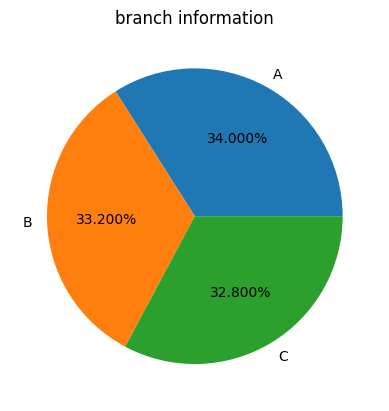

In [30]:
plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.3f%%')
plt.title("branch information")
plt.show()

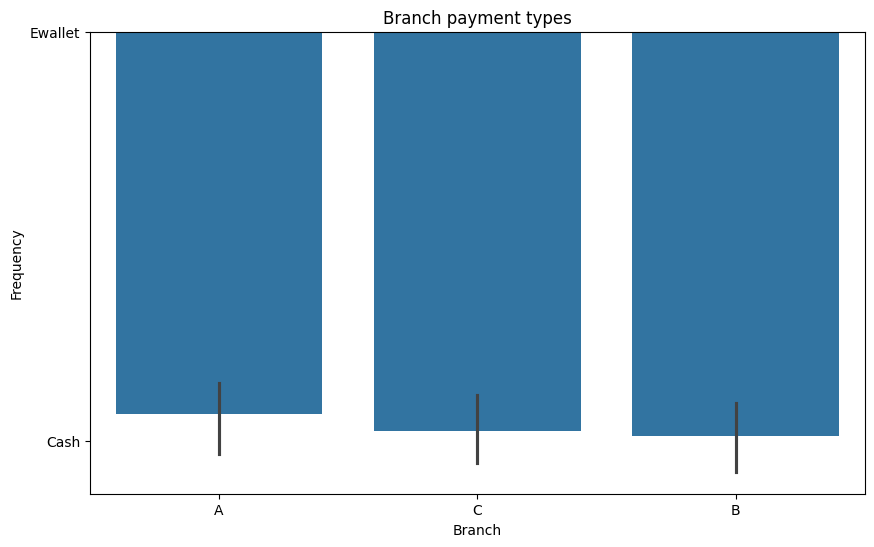

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x=sales_df["Branch"], y=sales_df["Payment"])
plt.title("Branch payment types")
plt.xlabel("Branch")
plt.ylabel("Frequency")
plt.show()

In [48]:
sales_df["Payment"].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

E-wallet - 345
Cash- 344
Credit Card- 311


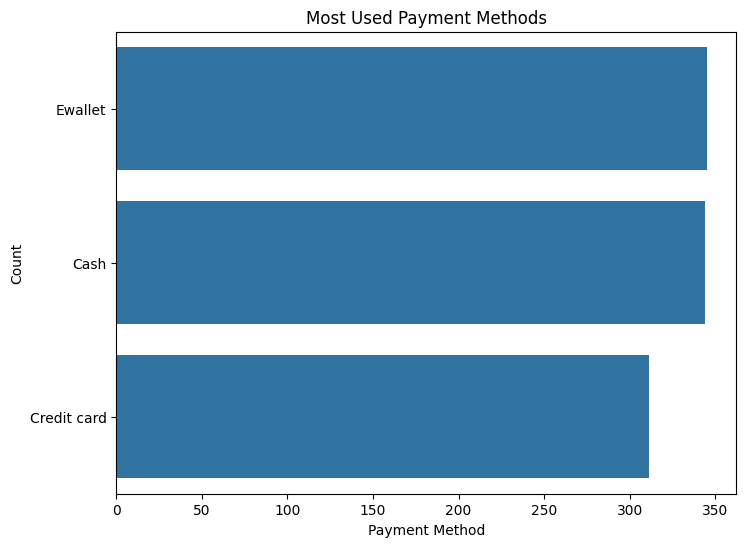

In [ ]:
# Payments type in countplot
 
plt.figure(figsize=(8, 6))
sns.countplot(sales_df["Payment"])
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Most Used Payment Methods")
A,B,C =sales_df.Payment.value_counts()

print('E-wallet -',A)
print('Cash-',B)
print('Credit Card-',C)
plt.show()

In [62]:
sales_df["Branch"].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

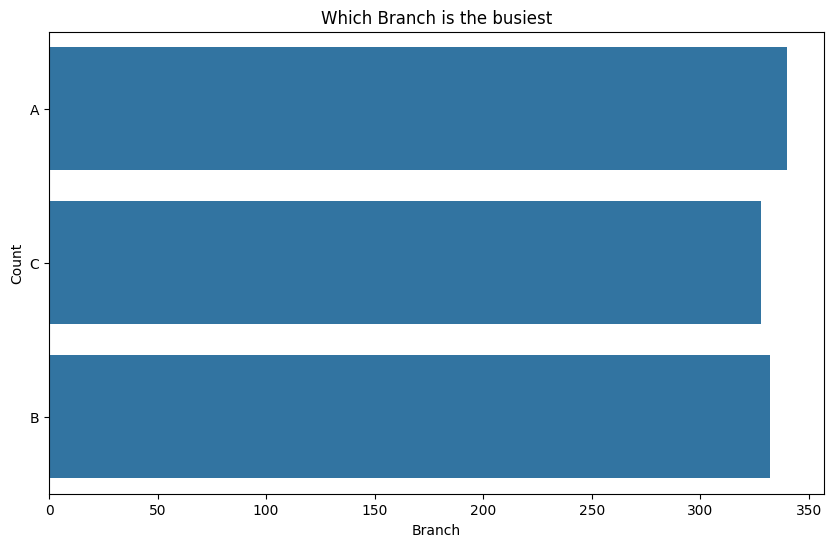

In [ ]:
# busiest branch using countplot

plt.figure(figsize=(10, 6))
sns.countplot(sales_df["Branch"])

plt.xlabel("Branch")
plt.ylabel("Count")
plt.title("Which Branch is the busiest")
plt.show()


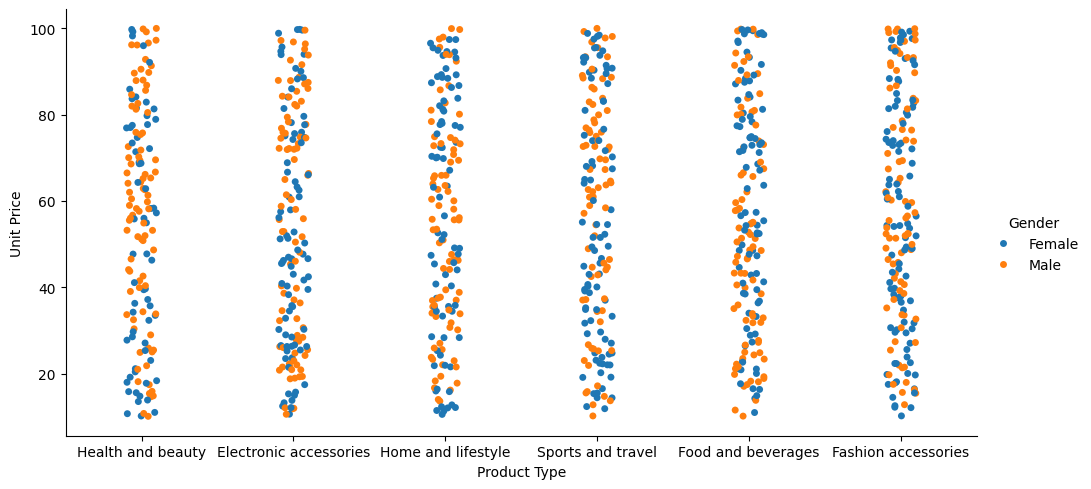

In [69]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=sales_df,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

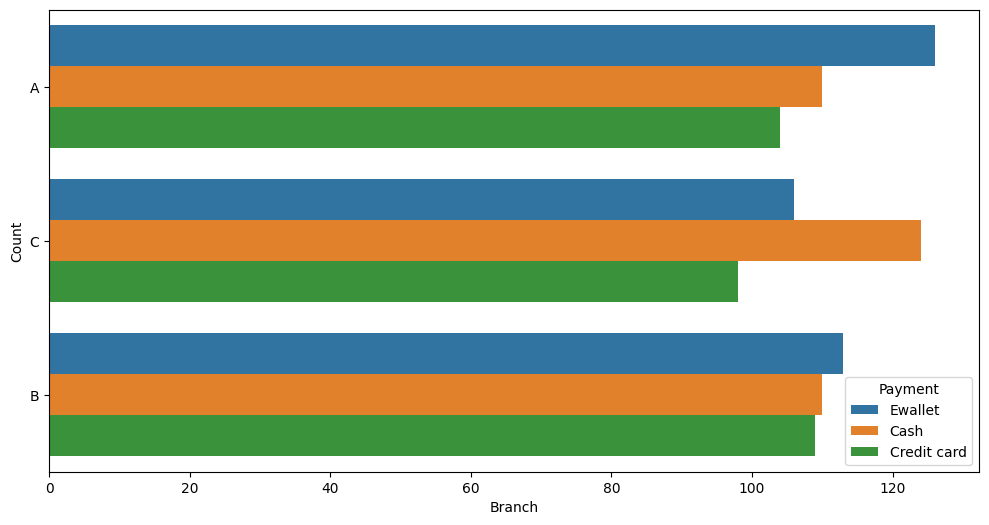

In [ ]:
# Branch and payement systems visualisation

plt.figure(figsize=(12, 6))
sns.countplot(y="Branch", hue="Payment", data=sales_df)
plt.xlabel("Count")
plt.ylabel("Branch")
plt.show()

In [74]:
# finding which branch has better sale for a particular product type
sales_df["Product line"].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

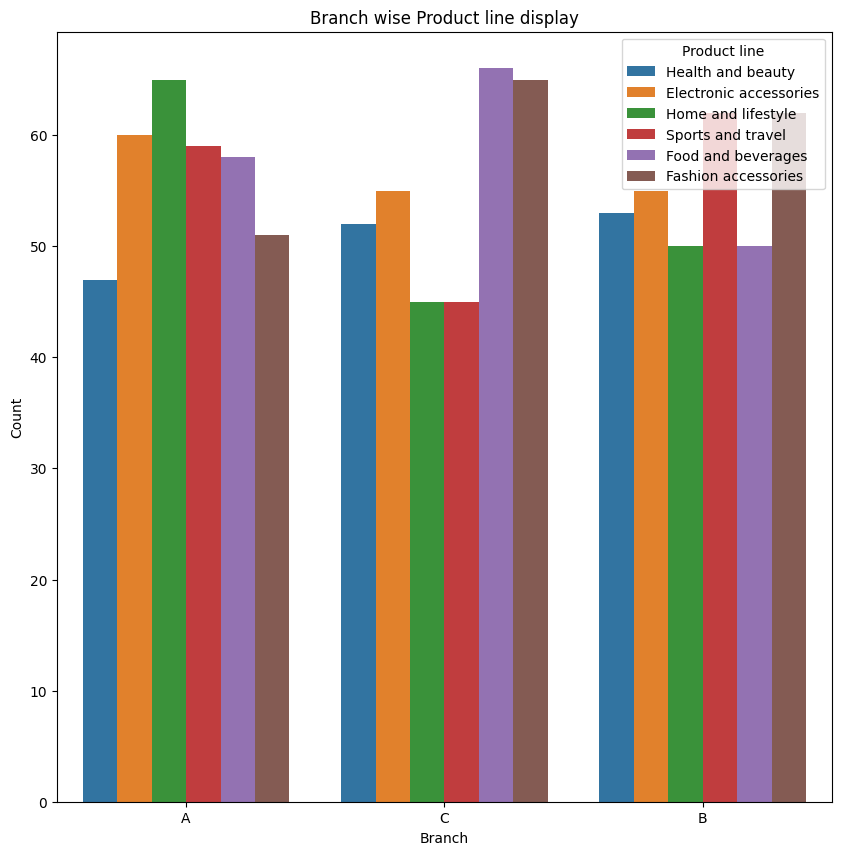

In [ ]:
# viewing product line sales in diff branches

plt.figure(figsize=(10, 10))
sns.countplot(x="Branch", hue="Product line", data=sales_df)
plt.xlabel("Branch")
plt.ylabel("Count")
plt.title("Branch wise Product line display")
plt.show()

In [4]:
from wordcloud import WordCloud

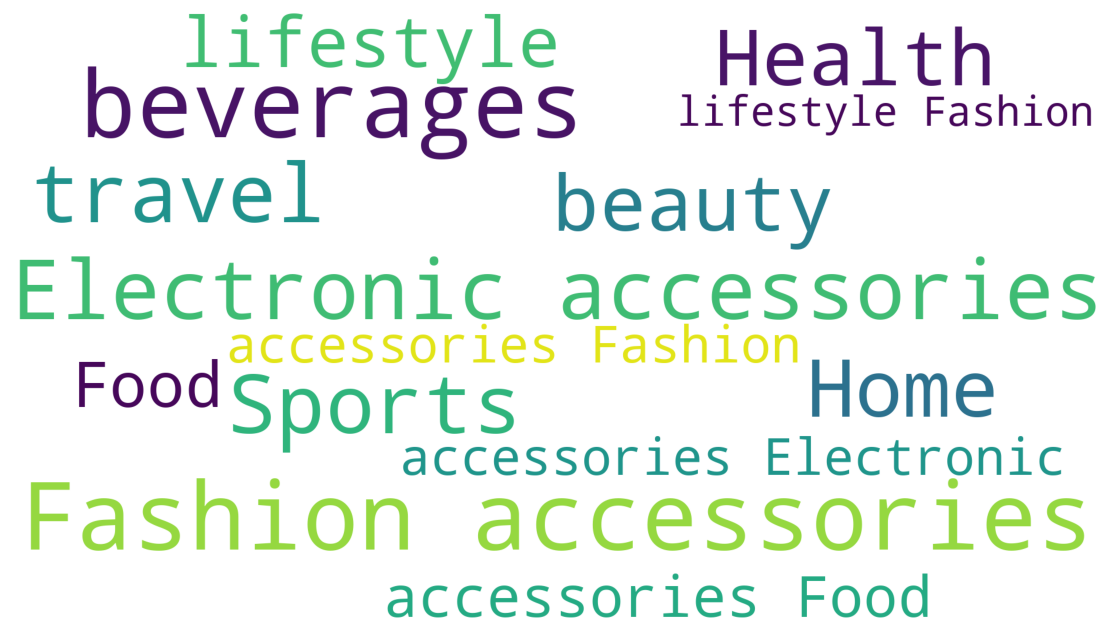

In [12]:
# Drawing wordcloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(sales_df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

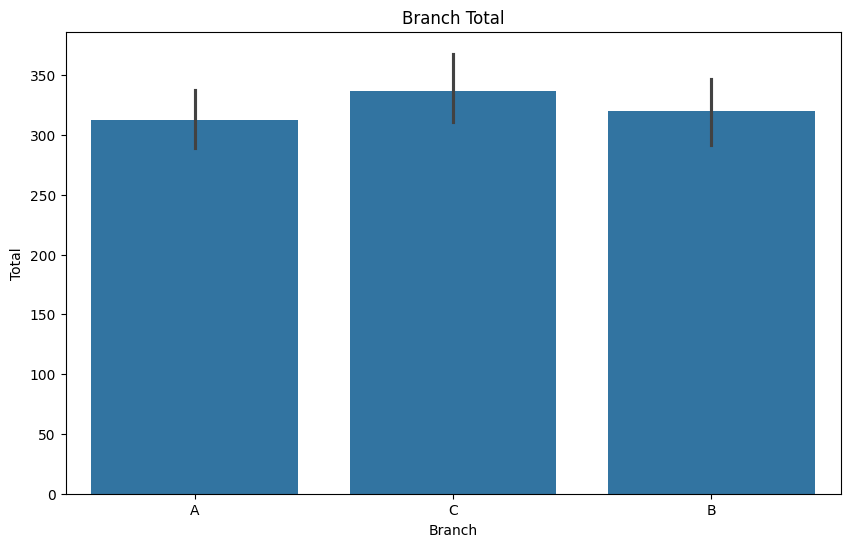

In [88]:
# bar chart

plt.figure(figsize=(10,6))
sns.barplot(data=sales_df, x="Branch", y="Total")

plt.title("Branch Total")
plt.xlabel("Branch")
plt.ylabel("Total")
plt.show()

In [99]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   object        
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

C:\Users\Dell\AppData\Local\Temp\ipykernel_20492\2174600250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product line", data=sales_df, palette='coolwarm')


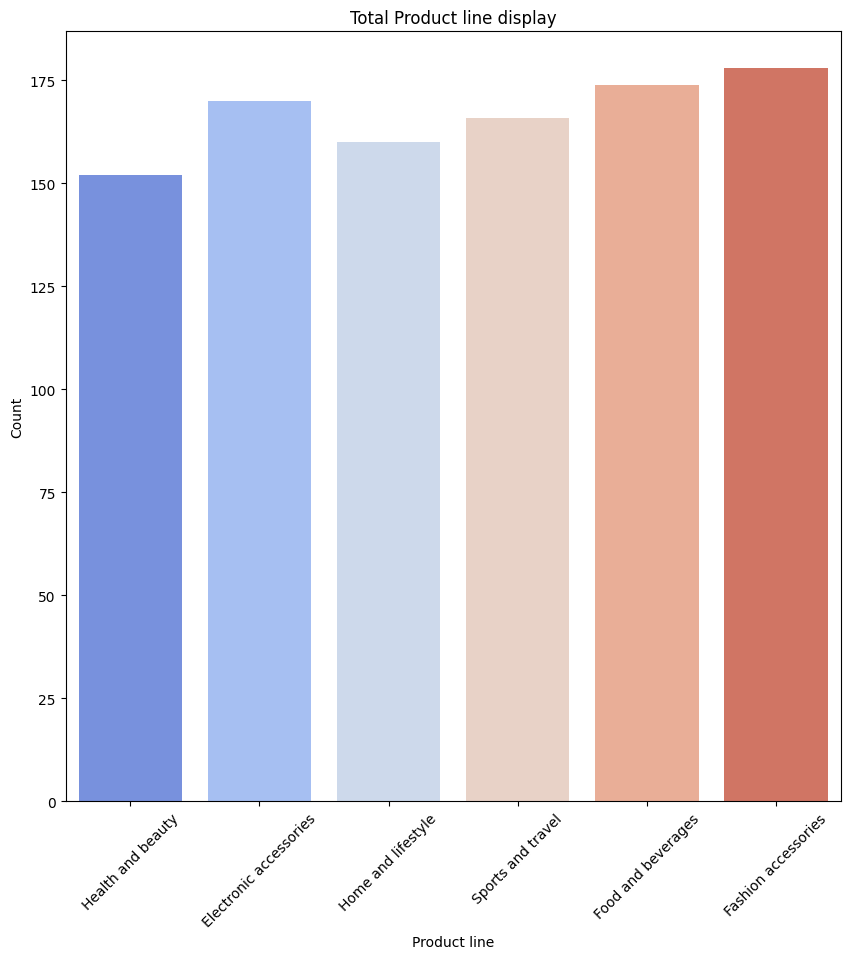

In [18]:
# viewing product line sales in total

plt.figure(figsize=(10, 10))
sns.countplot(x="Product line", data=sales_df, palette='coolwarm')
plt.xlabel("Product line")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Total Product line display")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20492\1937938333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Product line", x='Tax 5%', palette="coolwarm", data=sales_df)


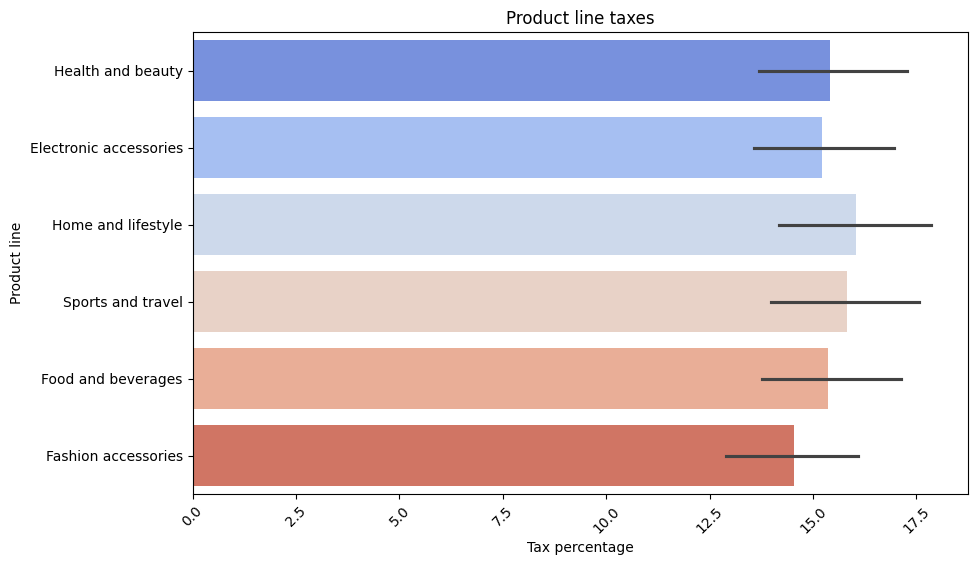

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(y="Product line", x='Tax 5%', palette="coolwarm", data=sales_df)
plt.xlabel("Tax percentage")
plt.ylabel("Product line")
plt.title("Product line taxes")
plt.xticks(rotation=45)
plt.show()

# Conclusion

1. No. of Sales among all the branches are nearly equal.
2. Fashion accesories are the most sold product whereas health and beauty products are lesser but vast differences in product sales was not observed

